## Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

## Constants


In [2]:
vocab_size = 2500

training_data_file = 'SpamData/02_Training/Train-data.txt'
testing_data_file = 'SpamData/03_Testing/Test-data.txt'

token_spam_prob_file = 'SpamData/03_Testing/prob-spam.txt'
toekn_ham_prob_file = 'SpamData/03_Testing/prob-ham.txt'
toekn_all_prob_file = 'SpamData/03_Testing/prob-all-tokens.txt'

test_feature_matrix = 'SpamData/03_Testing/test-features.txt'
test_target_file = 'SpamData/03_Testing/test-target.txt'

## Load the Data


In [3]:
#features
x_test = np.loadtxt(test_feature_matrix, delimiter=' ')

#target
y_test = np.loadtxt(test_target_file, delimiter=' ')

#token probabilites
prob_token_spam = np.loadtxt(token_spam_prob_file, delimiter=' ')
prob_token_ham = np.loadtxt(toekn_ham_prob_file, delimiter=' ')
prob_all_tokens = np.loadtxt(toekn_all_prob_file, delimiter=' ')

## Calculating the Joint Probability 
### Dot Product

In [4]:
prob_token_spam.shape

(2500,)

In [5]:
print("The shape of the dot product is", x_test.dot(prob_token_spam).shape)

The shape of the dot product is (1724,)


## Set the prior
$$ P(Spam \, | \, X) = \frac {P(X \, | \, Spam ) \, P(Spam)} {P(X)} $$

In [6]:
prob_spam = 0.3116
np.log(prob_token_spam)

array([ -4.40783795,  -5.25391276,  -4.9903152 , ...,  -9.26124594,
       -10.01501775, -12.09445929], shape=(2500,))

In [7]:
joint_log_spam = x_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(prob_spam)
joint_log_spam

array([  22.73932145,    2.16870846,   20.57221335, ..., -375.87360484,
         -9.89631098, -114.46813573], shape=(1724,))

$$ P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1-P(Spam))} {P(X)} $$

In [8]:
joint_log_ham = x_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-prob_spam)

## Making Prediction
# Checking for Higher Point Probability
$$ P(Spam \, | \, X) \, > \, P(Ham \, | \, X) $$
<br>
<center> OR <center>
<br>

$$ P(Spam \, | \, X) \, < \, P(Ham \, | \, X) $$


In [9]:
prediction = joint_log_spam > joint_log_ham
prediction[-5:]*1

array([1, 0, 0, 0, 0])

In [10]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

## Simplify 

In [11]:
joint_log_spam = x_test.dot(np.log(prob_token_spam) )+ np.log(prob_spam)
joint_log_ham = x_test.dot(np.log(prob_token_ham) )+ np.log(1-prob_spam)

## Metrics and Evaluation 

### Accuracy

In [12]:
correct_doc = (y_test == prediction).sum()
print('Docs Classified Correctly: ', correct_doc)

wrong_docs = (y_test != prediction).sum() 
print('Docs not Classified Correctly: ', wrong_docs)


Docs Classified Correctly:  1685
Docs not Classified Correctly:  39


### $\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$


In [13]:
#Accuracy
correct_doc/len(x_test)
fraction_right = correct_doc/len(x_test)


In [14]:
fraction_wrong = wrong_docs/len(x_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%} '.format(fraction_right))

Fraction classified incorrectly is 2.26%
Accuracy of the model is 97.74% 


## Visualising Our Results

In [15]:
# Chart Styling info
y_axis_label = 'P(X) | Spam'
xaxis_label = 'P(X) | Nonspam'

linedata = np.linspace(start=-14000,stop=1,num=1000)

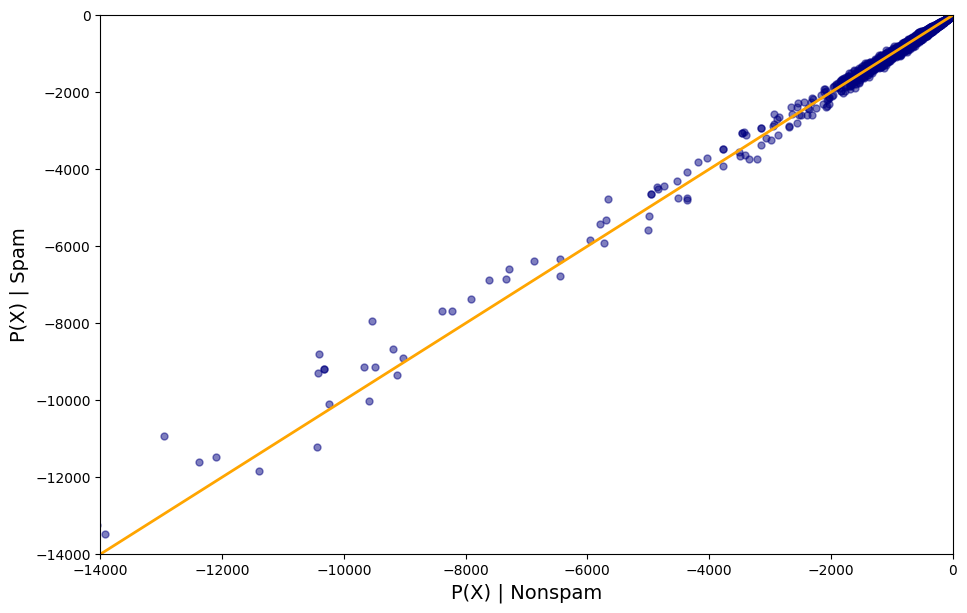

In [16]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(y_axis_label, fontsize = 14)

plt.xlim([-14000, 1])
plt.ylim([-14000, 1])


plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange', linewidth=2)
plt.style.use('fivethirtyeight')
plt.show()

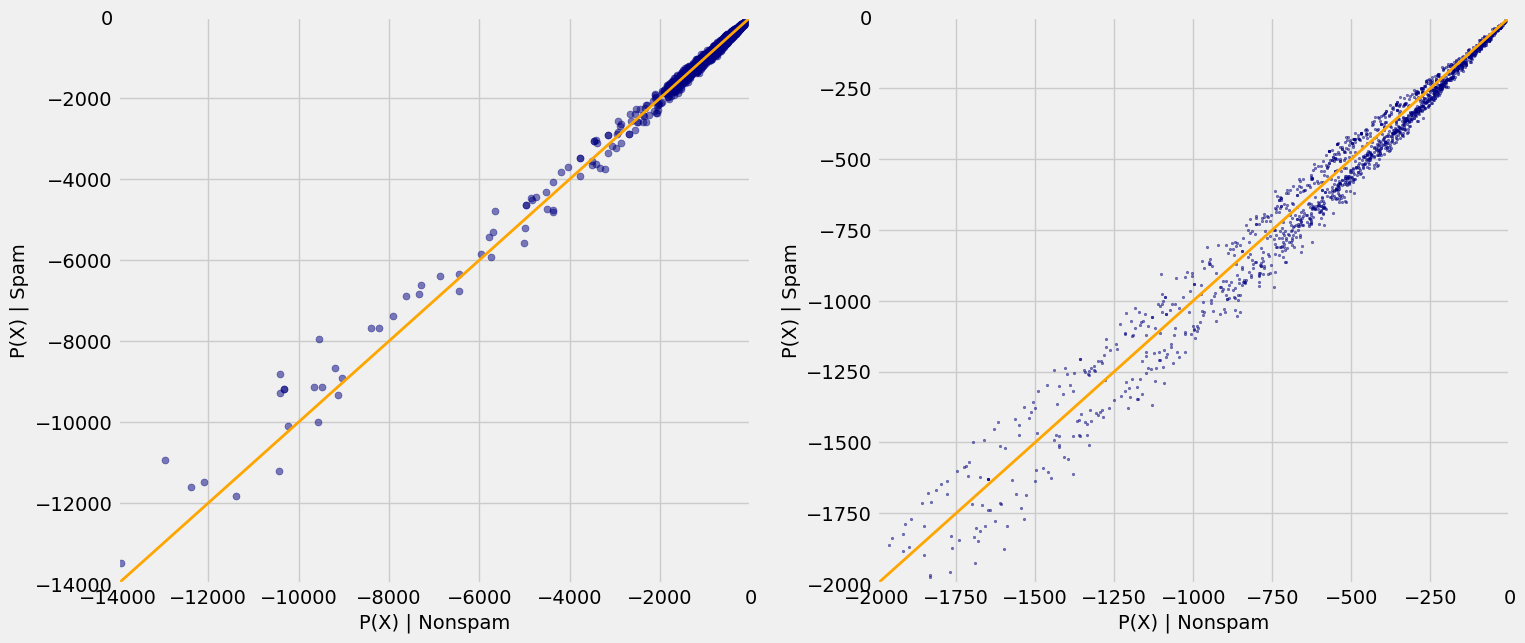

In [17]:
plt.figure(figsize=(16, 7))

plt.subplot(1,2,1)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(y_axis_label, fontsize = 14)

plt.xlim([-14000, 1])
plt.ylim([-14000, 1])


plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange', linewidth=2)

plt.subplot(1,2,2)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(y_axis_label, fontsize = 14)

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])


plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange', linewidth=2)
plt.style.use('fivethirtyeight')
plt.show()

In [18]:
# Chart Styling
sn.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({y_axis_label:joint_log_spam, xaxis_label:joint_log_ham, 
                           labels: y_test})

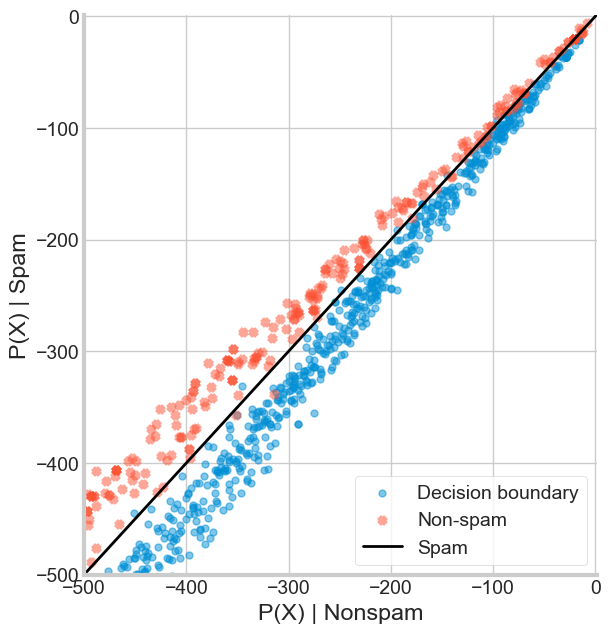

In [19]:
sn.lmplot(x=xaxis_label, y=y_axis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha':0.5, 's':25}, hue=labels, markers=['o', 'x'])

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black',linewidth=2)

plt.legend(('Decision boundary', 'Non-spam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

## **False Positve & False Negative**

In [20]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1136,  588]))

In [21]:
true_pos = (y_test == 1) & (prediction == 1)
true_pos.sum()

np.int64(569)

In [22]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

np.int64(19)

In [23]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

np.int64(20)

###  Recall Score

In [24]:
recall_score = true_pos.sum()/(true_pos.sum() + false_neg.sum())
print("The Recall Score is {:.2%}".format(recall_score))

The Recall Score is 96.60%


In [25]:
precision =  true_pos.sum()/(true_pos.sum() + false_pos.sum())
print("The Precision Score is {:.2%}".format(precision)) 

The Precision Score is 96.77%


In [26]:
f_score = 2* (precision * recall_score)/ (precision + recall_score)
print("The f Score is {:.2}".format(f_score)) 

The f Score is 0.97
